# Mini-project 1

The dataset contains the following columns:
1. **course_id:** Unique identifier for each course.
2. **course_type:** Indicates whether the course is delivered online or in a classroom setting (online/classroom).
3. **year:** The year the course was offered.
4. **enrollment_count:** Number of students enrolled in the course.
5. **pre_score:** Score on the pre-course assessment.
6. **post_score:** Score on the post-course assessment.
7. **pre_requirement:** Pre-requisite level required for the course enrollment.
8. **department:** The department offering the course.

Firstly importing all the necessary libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Now reading the data from the csv file.

In [5]:
df=pd.read_csv('data.csv')
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


#### Setting course_id as Index

In [6]:
df.set_index('course_id', inplace = True)
df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018,165,28.14,73.0,Beginner,Science
2,classroom,2020,175,79.68,86.0,NaN,Science
3,online,2016,257,57.24,80.0,NaN,Mathematics
4,online,2013,251,97.67,75.0,Beginner,Technology
5,classroom,2019,165,39.75,76.0,Beginner,Science


Getting some basic information about the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1850 entries, 1 to 1850
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_type       1850 non-null   object 
 1   year              1850 non-null   int64  
 2   enrollment_count  1850 non-null   int64  
 3   pre_score         1850 non-null   object 
 4   post_score        1665 non-null   float64
 5   pre_requirement   959 non-null    object 
 6   department        1850 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 115.6+ KB


Next, I'll clean and transform the data if necessary, starting with handling missing values and converting data types where appropriate.

#### Check for missing values

In [8]:
missing_values = df.isnull().sum()
missing_values


course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

#### Converting 'pre_score' to numeric, setting errors='coerce' to handle non-numeric values

In [9]:
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')

#### Handle missing values
For 'pre_score' and 'post_score', we can fill missing values with the mean of the respective columns.
For 'pre_requirement', we can fill missing values with the most frequent pre-requirement.


In [10]:
df['pre_score'].fillna(df['pre_score'].mean(), inplace=True)
df['post_score'].fillna(df['post_score'].mean(), inplace=True)
freq_pre_requirements = df.groupby('department')['pre_requirement'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

In [11]:
# Impute the missing values based on the frequent values within each department
def impute_pre_requirement(row):
    if pd.isnull(row['pre_requirement']):
        return freq_pre_requirements[row['department']]
    return row['pre_requirement']

df['pre_requirement'] = df.apply(impute_pre_requirement, axis=1)

In [12]:
# Verify that there are no more missing values
missing_values_after_cleaning = df.isnull().sum()



In [13]:

# Display the results
missing_values_after_cleaning


course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

In [14]:
df.head()


,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018,165,28.14,73.0,Beginner,Science
2,classroom,2020,175,79.68,86.0,Beginner,Science
3,online,2016,257,57.24,80.0,Beginner,Mathematics
4,online,2013,251,97.67,75.0,Beginner,Technology
5,classroom,2019,165,39.75,76.0,Beginner,Science


#### Check Unique Values in the 'department' Column
First, we identify the unique values in the department column to spot any inconsistencies.

In [15]:
unique_departments = df['department'].unique()
print(unique_departments)

['Science' 'Mathematics' 'Technology' 'Math' 'Engineering']


#### Standardize Department Names
Next, we replace inconsistent department names with standardized ones. For example, 'Math' should be replaced with 'Mathematics' and 'Tech' with 'Technology'.

In [16]:
df['department'] = df['department'].replace({'Math': 'Mathematics', 'Tech': 'Technology'})

Verify the Changes

In [17]:
after_cleaning = df['department'].unique()
print(after_cleaning)

['Science' 'Mathematics' 'Technology' 'Engineering']


#### Setting the year to date time format

In [18]:
df['year'] = pd.to_datetime(df['year'], format = '%Y')

In [19]:
df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018-01-01,165,28.14,73.0,Beginner,Science
2,classroom,2020-01-01,175,79.68,86.0,Beginner,Science
3,online,2016-01-01,257,57.24,80.0,Beginner,Mathematics
4,online,2013-01-01,251,97.67,75.0,Beginner,Technology
5,classroom,2019-01-01,165,39.75,76.0,Beginner,Science


In [20]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Data Anaylsis

#### Analyze Enrollment Trends Over the Years

Aggregate the Data: Group by year and sum the enrollment counts.

In [29]:
yearly_data = df.groupby('year')['enrollment_count'].sum().reset_index()

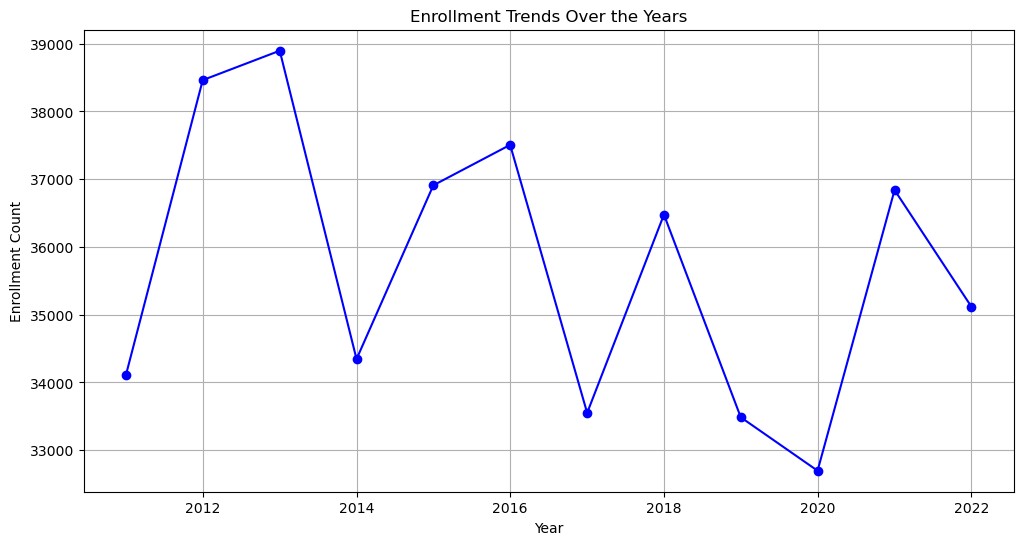

In [30]:


plt.figure(figsize=(12, 6))
plt.plot(yearly_data['year'], yearly_data['enrollment_count'], marker='o', linestyle='-', color='b')
plt.title('Enrollment Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.grid(True)


#### Compare Enrollment Counts Between Online and Classroom Courses

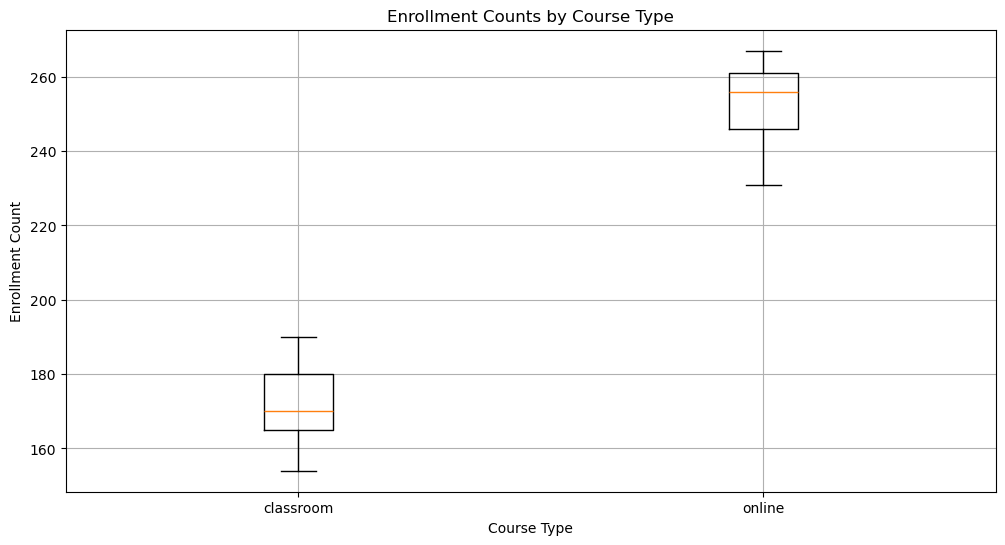

In [31]:
# Compare enrollment counts between online and classroom courses
plt.figure(figsize=(12, 6))
course_types = df['course_type'].unique()
enrollment_counts = [df[df['course_type'] == ct]['enrollment_count'].values for ct in course_types]
plt.boxplot(enrollment_counts, labels=course_types)
plt.title('Enrollment Counts by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.grid(True)
plt.show()


#### Investigate the Relationship Between Pre-course and Post-course Scores

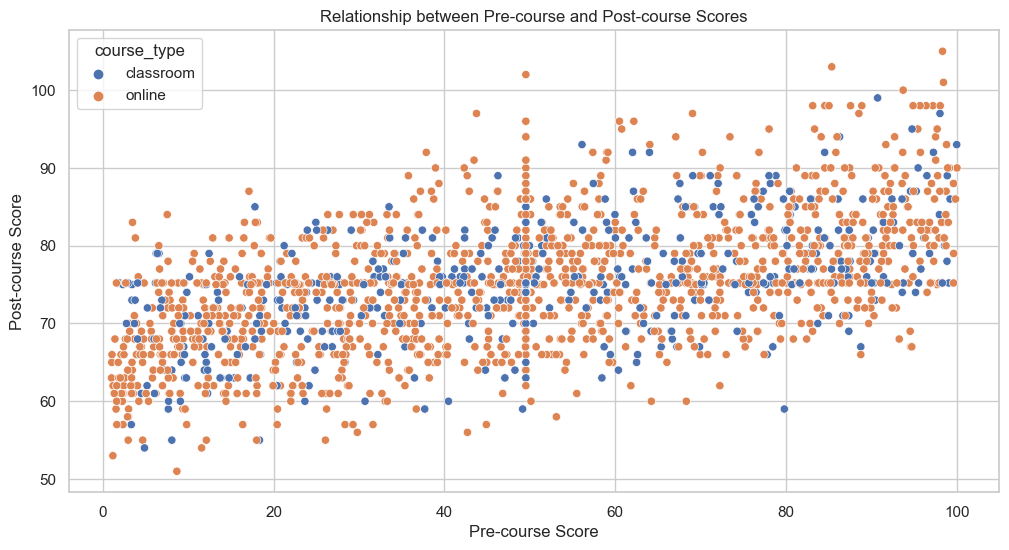

In [73]:
# Relationship between pre-course and post-course scores
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='pre_score', y='post_score', hue='course_type')
plt.title('Relationship between Pre-course and Post-course Scores')
plt.xlabel('Pre-course Score')
plt.ylabel('Post-course Score')
plt.show()


#### Histogram for frequency of pre-course scores in online courses

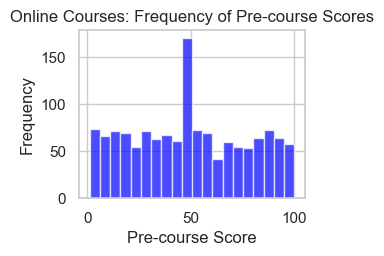

In [102]:
plt.subplot(2, 2, 2)
plt.hist(online_courses['pre_score'], bins=20, alpha=0.7, color='blue')
plt.title('Online Courses: Frequency of Pre-course Scores')
plt.xlabel('Pre-course Score')
plt.ylabel('Frequency')
plt.grid(True)

#### Histogram for frequency of pre-course scores in classroom courses

#### Examine the Impact of Pre-requirements on Enrollment

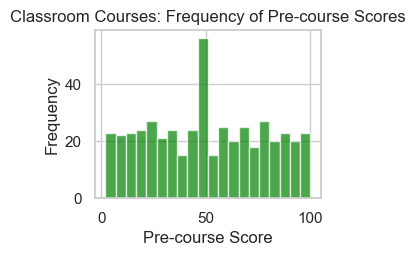

In [106]:
plt.subplot(2, 2, 4)
plt.hist(classroom_courses['pre_score'], bins=20, alpha=0.7, color='green')
plt.title('Classroom Courses: Frequency of Pre-course Scores')
plt.xlabel('Pre-course Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

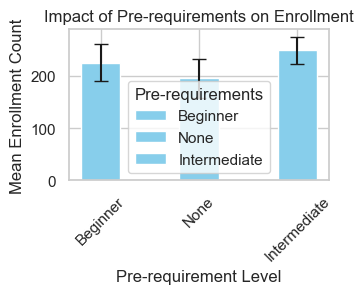

In [99]:
plt.subplot(2, 2, 4)
pre_requirements = df['pre_requirement'].unique()
mean_enrollment_counts = df.groupby('pre_requirement')['enrollment_count'].mean()
std_enrollment_counts = df.groupby('pre_requirement')['enrollment_count'].std()
bar_width = 0.4

bars = plt.bar(pre_requirements, mean_enrollment_counts, yerr=std_enrollment_counts, capsize=5, width=bar_width, color='skyblue')
plt.title('Impact of Pre-requirements on Enrollment')
plt.xlabel('Pre-requirement Level')
plt.ylabel('Mean Enrollment Count')
plt.xticks(rotation=45)
plt.legend(bars, pre_requirements, title='Pre-requirements')
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Performance Improvement Analysis


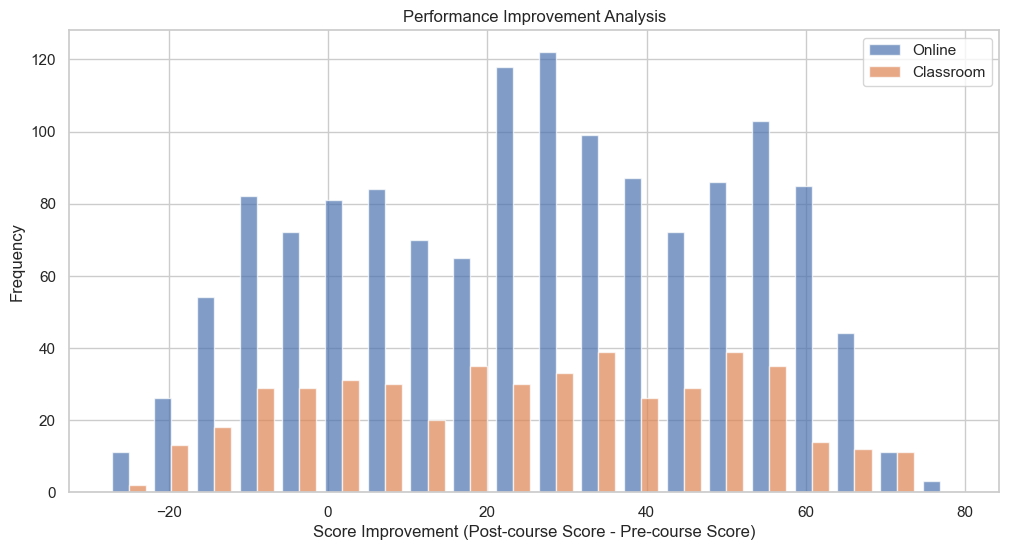

In [109]:
df['score_improvement'] = df['post_score'] - df['pre_score']
plt.figure(figsize=(12, 6))
plt.hist([df[df['course_type'] == 'online']['score_improvement'],
          df[df['course_type'] == 'classroom']['score_improvement']],
         bins=20, label=['Online', 'Classroom'], alpha=0.7)
plt.title('Performance Improvement Analysis')
plt.xlabel('Score Improvement (Post-course Score - Pre-course Score)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


#### Department-wise Enrollment


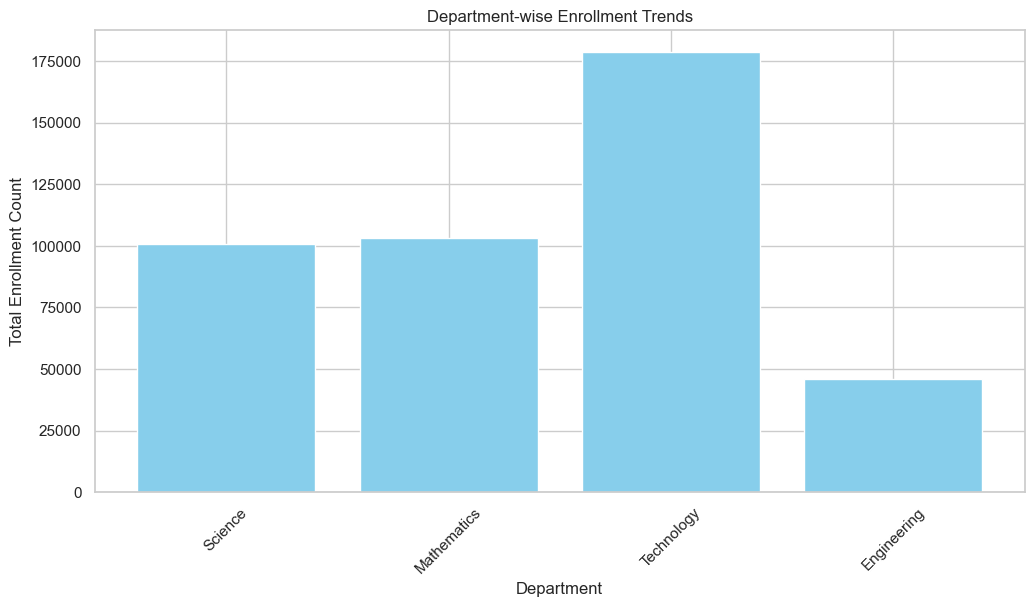

In [111]:
plt.figure(figsize=(12, 6))
departments = df['department'].unique()
enrollment_counts = [df[df['department'] == dept]['enrollment_count'].sum() for dept in departments]
plt.bar(departments, enrollment_counts, color='skyblue')
plt.title('Department-wise Enrollment Trends')
plt.xlabel('Department')
plt.ylabel('Total Enrollment Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Effect of Pre-course Scores on Enrollment

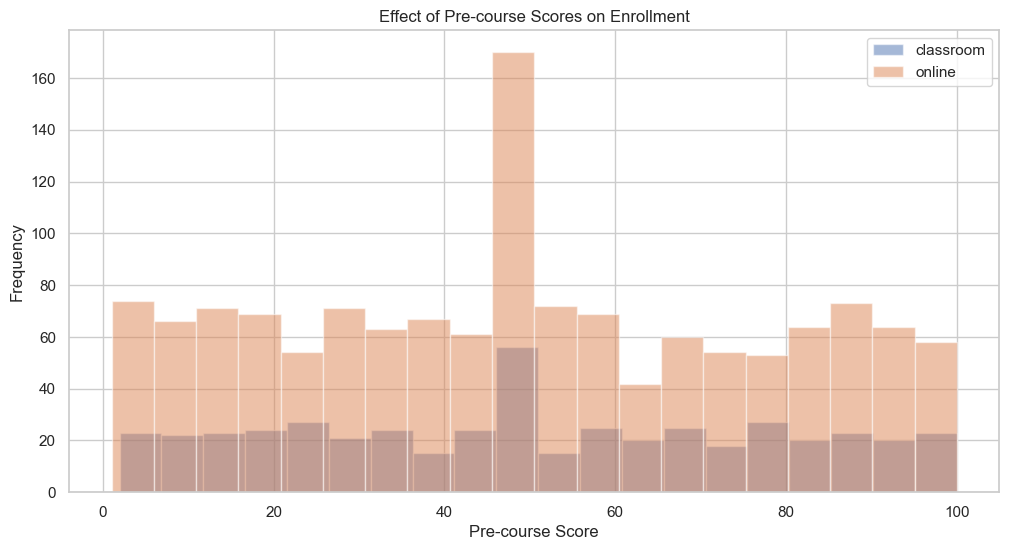

In [112]:
plt.figure(figsize=(12, 6))
for course_type in df['course_type'].unique():
    subset = df[df['course_type'] == course_type]
    plt.hist(subset['pre_score'], bins=20, alpha=0.5, label=course_type)
plt.title('Effect of Pre-course Scores on Enrollment')
plt.xlabel('Pre-course Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
